In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/included_docs.csv')
df = df[df['PY']==2021].reset_index(drop=True)
print(df.shape)
df.head()

(3214, 18)


,id,content,title,PY,wosarticle__de,wosarticle__wc,relevant,seen,1 - Adaptation,1 - Impacts,1 - Mitigation,wosarticle__dt,tslug,UT__UT,prediction,1 - Mitigation - prediction,1 - Adaptation - prediction,1 - Impacts - prediction
0,4963912,Objective To explore the association between n...,Exploration of the association between meteoro...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,explorationoftheassociationbetweenmeteorologic...,2-s2.0-85123003389,0.790797,0.010609,0.006835,0.980508
1,4843745,"The health, economic, and social impact of COV...",Effects of air pollution and climatology on CO...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,effectsofairpollutionandclimatologyoncovid19mo...,WOS:000678453400001,0.975590,0.120187,0.013905,0.954859
2,4912638,Climate change is increasing the frequency and...,Flood affectedness and household adaptation me...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,floodaffectednessandhouseholdadaptationmeasure...,WOS:000700090300003,0.683956,0.002423,0.860631,0.815160
3,4905712,Infectious diarrhea (ID) is an intestinal infe...,Temperature and risk of infectious diarrhea: a...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,temperatureandriskofinfectiousdiarrheaasystema...,WOS:000673836400022,0.590599,0.017460,0.072055,0.913756
4,4898551,Objectives: This study aimed to investigate th...,Particulate matter (PM10) as a newly identifie...,2021.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Article,particulatematterpm10asanewlyidentifiedenviron...,WOS:000632390700029,0.978455,0.063546,0.027324,0.973532


In [3]:
df['all_text'] = df['title'].astype(str) + " " + df['content'].astype(str) + " " + df['wosarticle__de'].astype(str)
pandemic_pattern = "(pandemic)|(corona.*virus)|(COVID)|(Cov2)|(SARS)|(H[0-9]N[0-9])|(HIV)|(plague)|(influenza)|(cholera)"
df['pandemic'] = df['all_text'].str.contains(pandemic_pattern, case=False)
df['covid'] = df['all_text'].str.contains("(corona.*virus)|(COVID)|(Cov2)", case=False)

df['adapt'] = df['all_text'].str.contains("(adapt)|(resilien)", case=False)
df['preparedness'] = df['all_text'].str.contains("(preparedness)", case=False)

print("adaptation: ", df['adapt'].sum())
print("covid: ", df['covid'].sum())
print("pandemic: ", df['pandemic'].sum())

/tmp/ipykernel_14878/3068696681.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['pandemic'] = df['all_text'].str.contains(pandemic_pattern, case=False)
/tmp/ipykernel_14878/3068696681.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['covid'] = df['all_text'].str.contains("(corona.*virus)|(COVID)|(Cov2)", case=False)
/tmp/ipykernel_14878/3068696681.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['adapt'] = df['all_text'].str.contains("(adapt)|(resilien)", case=False)
/tmp/ipykernel_14878/3068696681.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['preparedness'] = df['all_text'].str.contains("(preparedness)", case=False)


adaptation:  481
covid:  540
pandemic:  628


In [5]:
df['adapt'] = np.where(df['1 - Adaptation - prediction']>0.5,1,0)

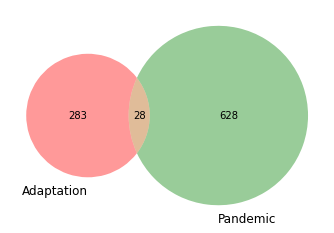

In [6]:
from matplotlib_venn import venn2

venn2(
    subsets=(df['adapt'].sum(),df['pandemic'].sum(),df[(df['adapt']) & df['pandemic']].shape[0]),
    set_labels=("Adaptation","Pandemic")
)

In [7]:
overlap = df[(df['adapt']) & df['pandemic']].shape[0]

(0.0, 69.03058135868015, -1.0, 47.24345927686122)

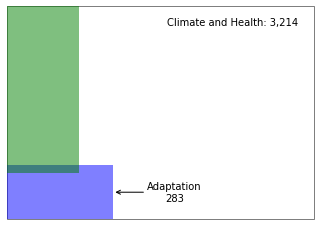

In [8]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

size = df.shape[0]

def rect_xy(z,m):
    x = np.sqrt(z)*m
    y = z/x
    return x, y

aspect = 1.2
x, y = rect_xy(size,aspect) 
ax.set_ylim(ymin=-1,ymax=y)
ax.set_xlim(xmax=x+1)

rect = Rectangle(
    (0,0), 
    x, y, 
    facecolor="white", ec="black",
    alpha=0.5
)
ax.add_patch(rect)
ax.annotate(
    f"Climate and Health: {df.shape[0]:,}",
    (x*.95,y*.95),va="top",ha="right"
)

x_adapt, y_adapt = rect_xy(df['adapt'].sum(), 1.4)
rect = Rectangle(
    (0,0), 
    x_adapt,y_adapt, 
    facecolor="blue", alpha=0.5
)
ax.annotate(
    f"Adaptation\n{df['adapt'].sum():,}", 
    (x_adapt,y_adapt/2),
    (x_adapt+x*0.2,y_adapt/2),
    arrowprops=dict(arrowstyle="->"),
    ha="center",va="center"
)
ax.add_patch(rect)

x_overlap, y_overlap = rect_xy(overlap, 3)
y_pandemic = df['pandemic'].sum()/x_overlap

rect = Rectangle(
    (0,y_adapt-y_overlap),
    x_overlap, y_pandemic, 
    facecolor="green", alpha=0.5
)
ax.add_patch(rect)



ax.set_aspect('equal')
ax.axis('off')

17.03223826599764


Text(0.5, 1.0, 'Proportion of the literature on Adaptation\n Pandemics, and the overlap between them')

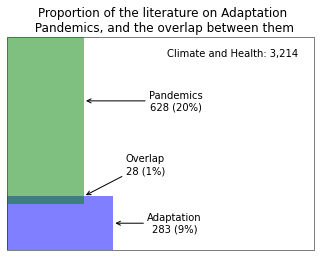

In [9]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

size = df.shape[0]

def rect_xy(z,m):
    x = np.sqrt(z)*m
    y = z/x
    return x, y

aspect = 1.2
x, y = rect_xy(size,aspect) 
ax.set_ylim(ymin=-1,ymax=y)
ax.set_xlim(xmax=x+1)

rect = Rectangle(
    (0,0), 
    x, y, 
    facecolor="white", ec="black",
    alpha=0.5
)
ax.add_patch(rect)
ax.annotate(
    f"Climate and Health: {df.shape[0]:,}",
    (x*.95,y*.95),va="top",ha="right"
)

x_adapt, y_adapt = rect_xy(df['adapt'].sum(), 1.4)
rect = Rectangle(
    (0,0), 
    x_adapt,y_adapt, 
    facecolor="blue", alpha=0.5
)
ax.annotate(
    f"Adaptation\n{df['adapt'].sum():,} ({df['adapt'].sum()/df.shape[0]:.0%})", 
    (x_adapt,y_adapt/2),
    (x_adapt+x*0.2,y_adapt/2),
    arrowprops=dict(arrowstyle="->"),
    ha="center",va="center"
)
ax.add_patch(rect)



x_overlap, y_overlap = rect_xy(overlap, 3)


y_pandemic = y-y_adapt
x_pandemic = (df['pandemic'].sum()-overlap)/y_pandemic
y_overlap = overlap/x_pandemic
print(x_pandemic)

rect = Rectangle(
    (0,y_adapt-y_overlap),
    x_pandemic, y_pandemic+y_overlap, 
    facecolor="green", alpha=0.5
)
ax.add_patch(rect)

ax.annotate(
    f"Pandemics\n{df['pandemic'].sum():,} ({df['pandemic'].sum()/df.shape[0]:.0%})", 
    (x_pandemic,y_adapt+y_pandemic*0.6),
    (x_pandemic+x*0.3,y_adapt+y_pandemic*0.6),
    arrowprops=dict(arrowstyle="->"),
    ha="center",va="center"
)


ax.annotate(
    f"Overlap\n{overlap:,} ({overlap/df.shape[0]:.0%})", 
    (x_pandemic,y_adapt),
    (x_pandemic+x*0.2,y_adapt+y_pandemic*0.2),
    arrowprops=dict(arrowstyle="->"),
    ha="center",va="center"
)


ax.set_aspect('equal')
ax.axis('off')

ax.set_title('Proportion of the literature on Adaptation\n Pandemics, and the overlap between them')

In [10]:
13+9+86

108